In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv(r"C:\Users\84941\Documents\Zalo Received Files\fake_bills.csv",sep=';')
df 

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [19]:
print(df.describe())  

        is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1500.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.485967   
std       0.471562     0.305195     0.299462      0.325627     0.655569   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.030000   
50%       1.000000   171.960000   104.040000    103.920000     4.330000   
75%       1.000000   172.170000   104.230000    104.150000     4.860000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up      length  
count  1500.000000  1500.00000  
mean      3.151473   112.67850  
std       0.231813     0.87273  
min       2.270000   109.49000  
25%       2.990000   112.03000  
50%       3.140000   112.96000  
75%       3.310000   113.34000  
max       3.910000   114.44000  


In [5]:
df['is_genuine'] = df['is_genuine'].replace(to_replace=[False,True],value= [0,1])

In [6]:
df['margin_low'] =df['margin_low'].fillna(df['margin_low'].mean())

In [7]:
df['is_genuine'].value_counts()

is_genuine
1    1000
0     500
Name: count, dtype: int64

## Data bị bias nên sẽ tăng số lượng True để cân bằng dữ liệu khi train

In [8]:
from sklearn.preprocessing import MinMaxScaler

x = df.drop('is_genuine',axis =1)
y = df['is_genuine']
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [9]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over,y_over = oversample.fit_resample(x, y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=42)

In [11]:
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
print('model score is: ', best_knn.score(x_test, y_test)* 100 ,'%')

model score is:  98.0 %


In [12]:
lr = LogisticRegression()
best_lr = GridSearchCV(lr,param_grid={'penalty': ['l1','l2','elasticnet',None],
                                    'dual':[True,False],
                                    'C':[1,1.5,2,2.5,3,3.5,4,4.5,5],
                                    'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
                                    'max_iter': [5,7]},cv=3,n_jobs=-1)
best_lr.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
                         'dual': [True, False], 'max_iter': [5, 7],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [13]:
lr = LogisticRegression(C=2.5, max_iter=5, penalty='l1', solver='liblinear')

In [14]:
lr.fit(x_train,y_train)

LogisticRegression(C=2.5, max_iter=5, penalty='l1', solver='liblinear')

In [15]:
pred = lr.predict(x_test)
print(classification_report(y_pred=pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       201
           1       0.95      0.99      0.97       199

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



<Axes: >

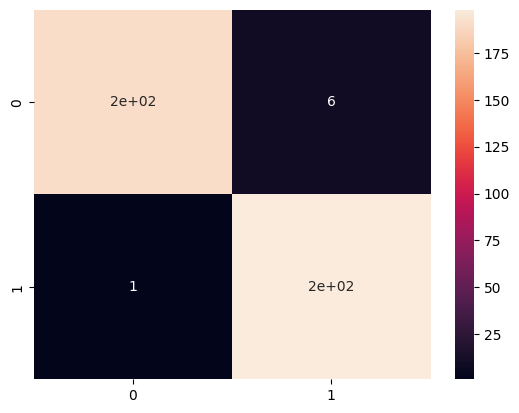

In [16]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_pred=pred,y_true=y_test),annot=[[195,   6],[  1, 198]])

In [17]:
confusion_matrix(y_pred=pred,y_true=y_test)

array([[191,  10],
       [  1, 198]], dtype=int64)